## Business Understanding

### Problem Statement

The film industry faces the ongoing challenge of predicting and understanding movie ratings. Movie ratings are critical for filmmakers, studios, and streaming platforms, as they influence the success and popularity of films. Accurate prediction of movie ratings is valuable for making informed decisions on film production, marketing, and distribution. The problem at hand is to develop a predictive model that can effectively estimate the rating of a movie based on its attributes, such as release year, genre, duration. This project aims to create a reliable movie rating prediction system to provide stakeholders with insights into the factors that influence movie ratings and help them make data-driven decisions in the dynamic film industry.

### Business Context

The film industry is a competitive and dynamic sector where understanding audience preferences and predicting movie success is crucial for profitability. Stakeholders in the film industry, including production companies, streaming platforms, and marketing teams, are continuously seeking ways to improve their decision-making processes. By accurately predicting movie ratings, they can:

- Allocate resources effectively for high-potential projects.
- Tailor marketing campaigns to the target audience.
- Enhance viewer engagement by recommending relevant content.
- Optimize pricing and distribution strategies for different markets.
- Minimize the risk of producing low-rated films.

This project addresses the need for a reliable and data-driven solution to assist industry professionals in making informed decisions. The movie rating prediction model developed here will enable stakeholders to gauge the potential success of a movie before its release, leading to more strategic and successful ventures in the film industry.

### Project Objectives

1. **Develop a Predictive Model**: Build a robust predictive model that accurately estimates the rating of a movie based on its attributes, such as release year, genre, and cast.

2. **Provide Data-Driven Insights**: Analyze the dataset to identify patterns and trends that contribute to movie ratings, offering valuable insights to stakeholders.

3. **Recommendation Generation**: Generate data-driven recommendations for filmmakers, production companies, and other industry professionals to improve movie ratings.

4. **Business Decision Support**: Assist stakeholders in making informed decisions regarding movie production, marketing, and distribution by providing reliable rating predictions.

5. **Enhance Competitiveness**: Help the film industry stakeholders gain a competitive edge by using data-driven strategies and insights to enhance the success and impact of their movies.

6. **Optimize Resource Allocation**: Enable stakeholders to allocate resources effectively by focusing on projects with the potential for higher ratings and popularity.

7. **Risk Mitigation**: Minimize the risk of producing movies that receive low ratings and lack commercial success.

8. **Continuous Learning**: Promote a culture of continuous learning and adaptation in the film industry by staying up to date with changing audience preferences.

9. **Long-Term Success**: Contribute to the long-term success and sustainability of the film industry by helping stakeholders make data-informed decisions and mitigate risks.

## Data understanding

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


Our target variable is Rating. 
This is a regression task. 

Check the shape of the dataset

In [3]:
df.shape

(15509, 10)

Check for duplicates

In [4]:
df.duplicated().sum()

6

Are there any missing values?

In [5]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

Data types of the features

In [6]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

Descriptive statistics

In [7]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


Data preparation

Remove duplicates

In [8]:
duplicates = df[df.duplicated()]
print(duplicates)

                            Name    Year Duration     Genre  Rating Votes  \
1250   Arab Ka Sona - Abu Kaalia  (1979)      NaN    Action     NaN   NaN   
1769                     Balidan  (1992)      NaN     Drama     NaN   NaN   
4723     First Time - Pehli Baar  (2009)      NaN       NaN     NaN   NaN   
9713                     Musafir     NaN      NaN  Thriller     NaN   NaN   
13069                    Shivani  (2019)      NaN     Crime     NaN   NaN   
13308          Slumdog Karodpati  (2019)  118 min  Thriller     NaN   NaN   

                  Director      Actor 1       Actor 2     Actor 3  
1250        Master Bhagwan    Meena Rai    Dara Singh         NaN  
1769                   NaN          NaN           NaN         NaN  
4723          Raja Bundela  Zeenat Aman   Nitin Arora  Raj Babbar  
9713           Shiva Dagar          NaN           NaN         NaN  
13069  Ugresh Prasad Ujala      Santosh           NaN         NaN  
13308        Rajesh Patole  Udhav Garje  Rahul Gavan

In [9]:
df.drop_duplicates(keep=False, inplace=True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


Check if the duplicates have been removed. Iniatially we had 6.

In [10]:
df.duplicated().sum()

0

Missing values treatment

In [11]:
df.dropna(subset=['Rating'], inplace=True)

In [12]:
df.isna().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [13]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


We dropped missing values in Rating as imputing them will lead to biasness

In [14]:
import re
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)

In [15]:
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

In [16]:
df.rename(columns={'Duration':'Duration(minutes)'},inplace=True)

In [17]:
df

,Name,Year,Duration(minutes),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.00000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110.00000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147.00000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142.00000,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82.00000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),132.29448,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125.00000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),132.29448,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129.00000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


I am dropping the missing values in columns; actor1,2,3 and also in director column.

In [18]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3'],inplace=True)

In [19]:
df

,Name,Year,Duration(minutes),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.00000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110.00000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147.00000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142.00000,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82.00000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),132.29448,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125.00000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),132.29448,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129.00000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [20]:
df.isna().sum()

Name                  0
Year                  0
Duration(minutes)     0
Genre                69
Rating                0
Votes                 0
Director              0
Actor 1               0
Actor 2               0
Actor 3               0
dtype: int64

I will fill the missing values in the Genre column using the modal genre.

In [21]:
df['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Drama, History',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Thriller', 'Comedy', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Sport', 'Biography, Drama, History',
       'Horror, Romance', 'Crime, Drama', 'Drama, Romance',
       'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Drama', 'Crime, Thriller',
       'Horror, Sci-Fi, Thriller', 'Drama, Mystery, Thriller',
       'Drama, Sport', 'Drama, Family, Musical', 'Action, Comedy',


In [22]:
most_common_genre = df['Genre'].mode()[0]
most_common_genre

'Drama'

In [23]:
df['Genre'].fillna(most_common_genre,inplace=True)

In [24]:
df['Duration(minutes)'].describe()

count    7627.000000
mean      133.183558
std        21.865209
min        21.000000
25%       125.000000
50%       132.294480
75%       144.000000
max       321.000000
Name: Duration(minutes), dtype: float64

I cannot drop the missing values in Duration as it will make the dataset really small. Also imputed 2000 values will lead to biasness. I will therefore mark them as missing.

In [25]:
df.isna().sum()

Name                 0
Year                 0
Duration(minutes)    0
Genre                0
Rating               0
Votes                0
Director             0
Actor 1              0
Actor 2              0
Actor 3              0
dtype: int64

We have filled in the missing values. 

In [26]:
df.dtypes

Name                  object
Year                  object
Duration(minutes)    float64
Genre                 object
Rating               float64
Votes                 object
Director              object
Actor 1               object
Actor 2               object
Actor 3               object
dtype: object

Next step is to change the data types of the following features; Year and Voting to intergers.

In [27]:
df['Year'] = df['Year'].str.replace(r'[()\',"]','', regex=True).astype(int)

In [28]:
df['Votes'] = df['Votes'].str.replace(r'[(),\'",]','',regex=True).astype(int)

In [29]:
df.dtypes

Name                  object
Year                   int32
Duration(minutes)    float64
Genre                 object
Rating               float64
Votes                  int32
Director              object
Actor 1               object
Actor 2               object
Actor 3               object
dtype: object

In [30]:
df

,Name,Year,Duration(minutes),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.00000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.00000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.00000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.00000,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.00000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,132.29448,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125.00000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,132.29448,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129.00000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


Our dataset is now clean.

Check outliers in numeric features.

In [31]:
df['Rating'].unique()

array([ 7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,  6.3,
        7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  5. ,  4.5,  6.4,  4.1,  4.8,
        8.1,  5.5,  6.8,  6.1,  7.7,  5.1,  3.1,  3.3,  7.8,  8.4,  5.2,
        4.3,  5.8,  4.6,  7.5,  6.7,  3.6,  3.9,  4.2,  5.3,  3.4,  5.4,
        3. ,  8. ,  6. ,  3.8,  7.9,  2.7,  4.9,  2.4,  7.6,  3.7,  3.2,
        2.5,  2.8,  2.6,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,  2.3,
        8.5,  8.6,  9.6,  1.7,  9. ,  1.4,  8.9,  1.9,  9.1,  9.4,  9.7,
        1.8,  9.2,  2. ,  1.6, 10. ,  2.2,  1.1])

### Exploratory Data Analysis

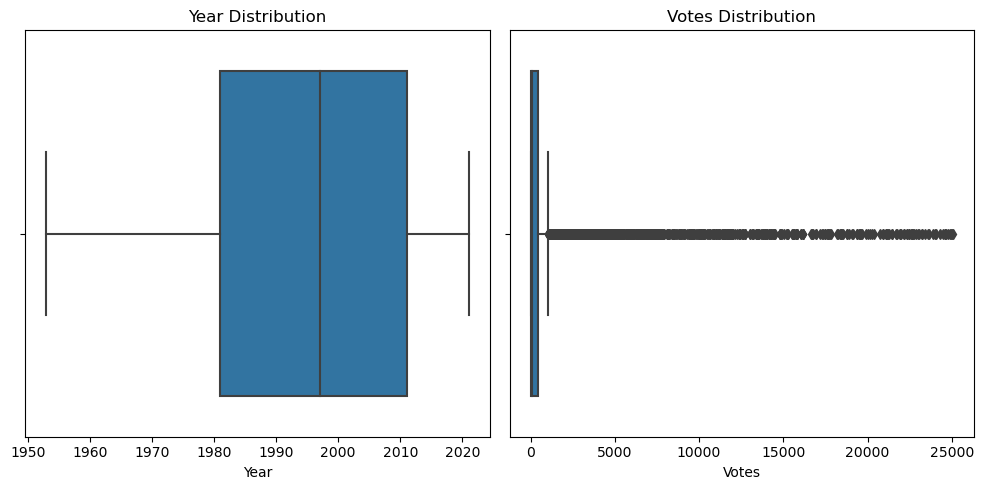

In [32]:
import seaborn as sns
cols = ['Year','Votes']

#function to remove outliers
def remove_outliers(df, columns,threshold =2):

    df_cleaned = df.copy()
    for column in columns:

         z_scores = (df[column]- df[column].mean())/df[column].std()
         outliers = df_cleaned.loc[abs(z_scores)> threshold]
         df_cleaned = df_cleaned.drop(outliers.index)
    return df_cleaned
df = remove_outliers(df,cols)

# Plot box plots for the cleaned DataFrame
plt.figure(figsize=(10, 5))
for i, column in enumerate(cols):
    plt.subplot(len(cols)//2 + len(cols)%2, 2, i+1)
    sns.boxplot(data=df, x=column)
    plt.title(f"{column} Distribution")
plt.tight_layout()
plt.show()

Next is to check for the correlation of the features to each other

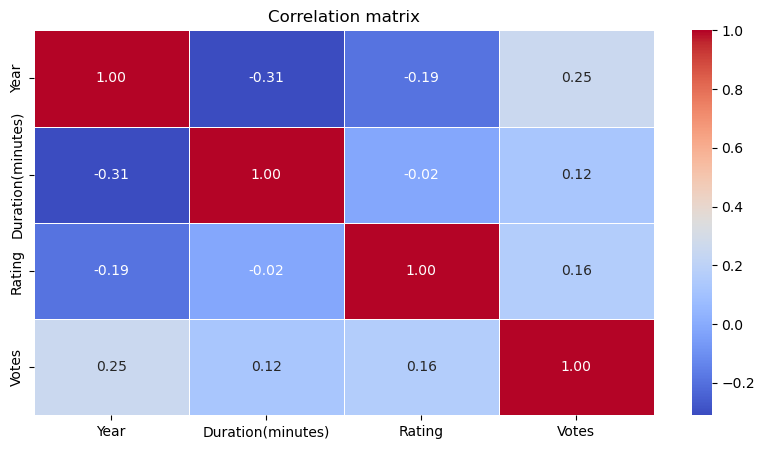

In [33]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix')
plt.show();

From the matrix above, there is minimal correlation between features.

Distribution of movies by decades

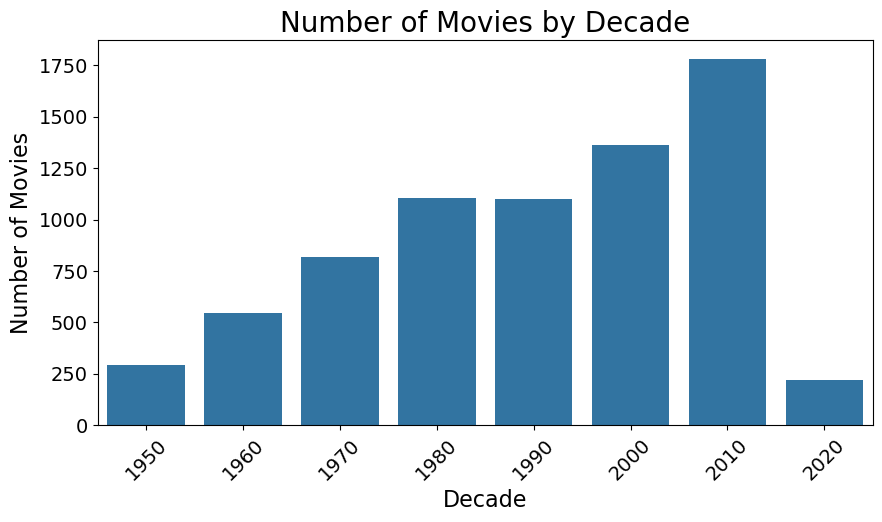

In [34]:
# Group years by decades
df['Decade'] = (df['Year'] // 10) * 10

fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(x='Decade',
              data=df,
              color='tab:blue')

plt.xlabel("Decade", fontsize=16)
plt.ylabel("Number of Movies", fontsize=16)
plt.title("Number of Movies by Decade", fontsize=20)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
ax.grid(False)

# Update x-axis labels with the decade range
decades = np.sort(df['Decade'].dropna().unique())
plt.xticks(np.arange(len(decades)), decades)

plt.show()

From the visualization above, we can see that there were a lot of movie production in the 2000s. The discovery and widespread adoption of the internet played a crucial role in transforming the film and entertainment industry.
The drop in movie production in the 2010s can be attributed to several factors, including the global economic challenges following the Great Recession of the late 2000s. Additionally, changing consumer behavior, marked by the growth of online streaming platforms, may have redirected creative talent and resources away from traditional movie production.

2. Does the length of movie affect its rating?

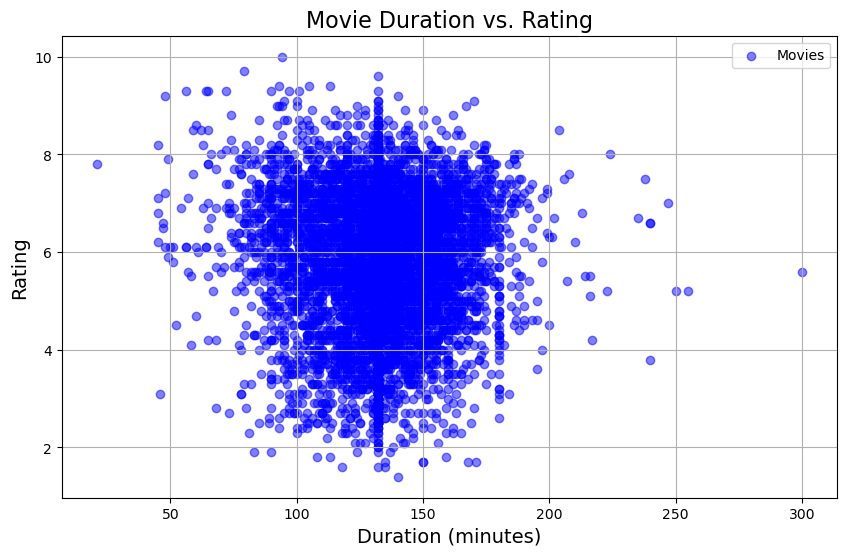

In [35]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration(minutes)'], df['Rating'], alpha=0.5, color='b', label='Movies')
# Add labels and title
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.title('Movie Duration vs. Rating', fontsize=16)

plt.grid(True)
plt.legend()
plt.show()

From the visualization above, we can see that movies of 120 to 150 minutes duration are rated high.

3. Distribution of genres

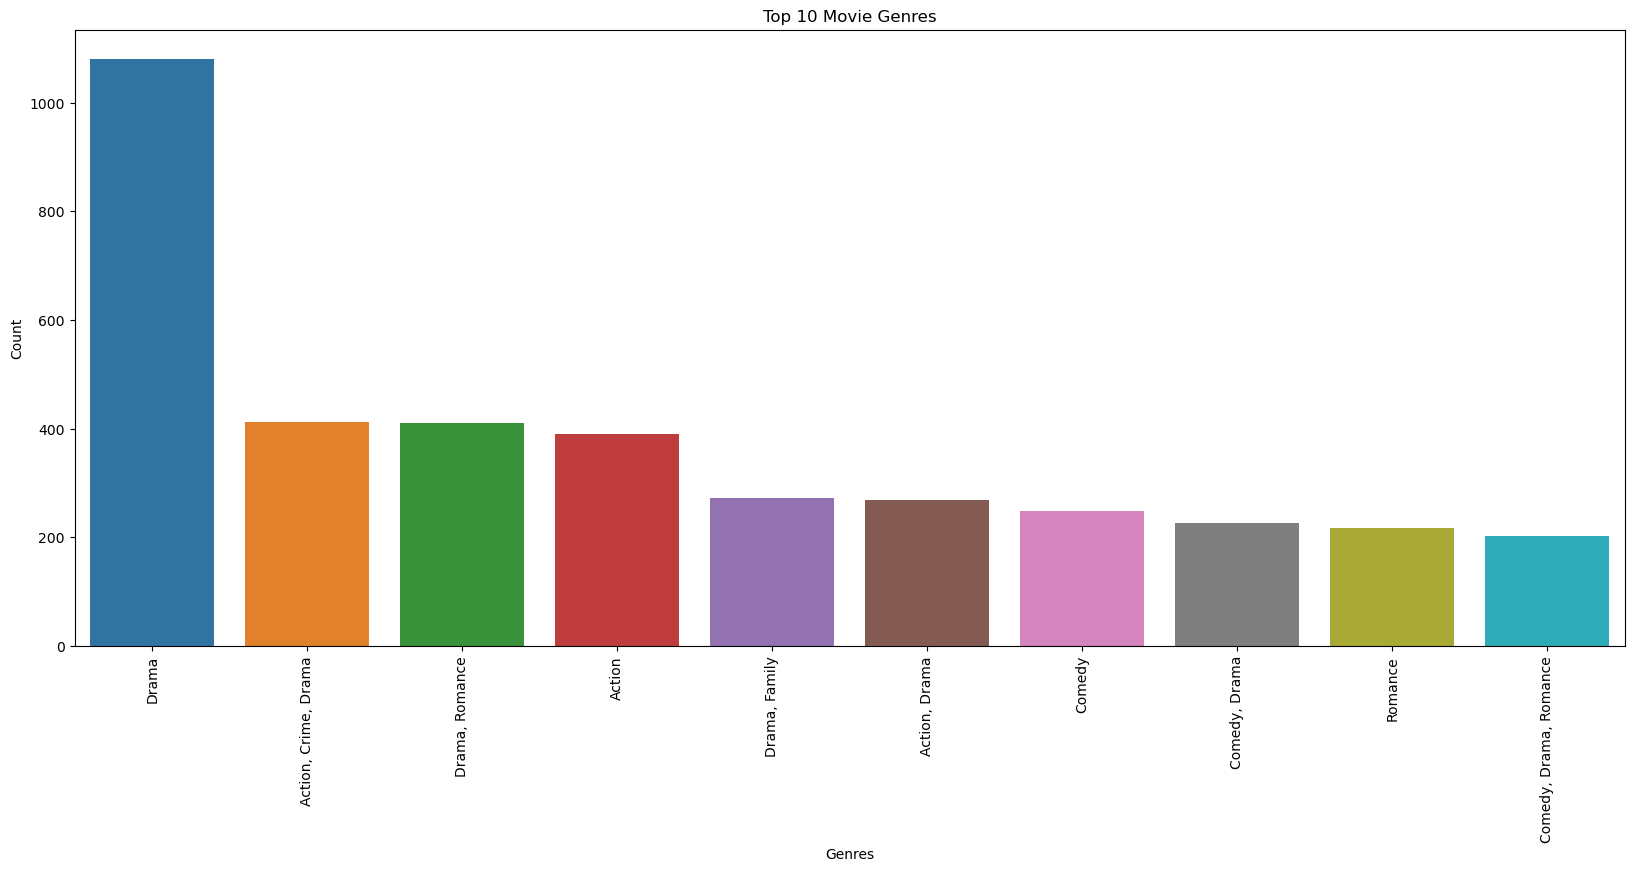

In [36]:
fig, ax = plt.subplots(figsize=(20, 8))  

genres_counts = df['Genre'].value_counts().head(10)
sns.barplot(x=genres_counts.index, y=genres_counts.values)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 10 Movie Genres')
plt.xticks(rotation=90)
plt.show()

Drama, Action and Action,crime,Drama genres are the top three perfoming genres respectively.

4. Ratings distribution

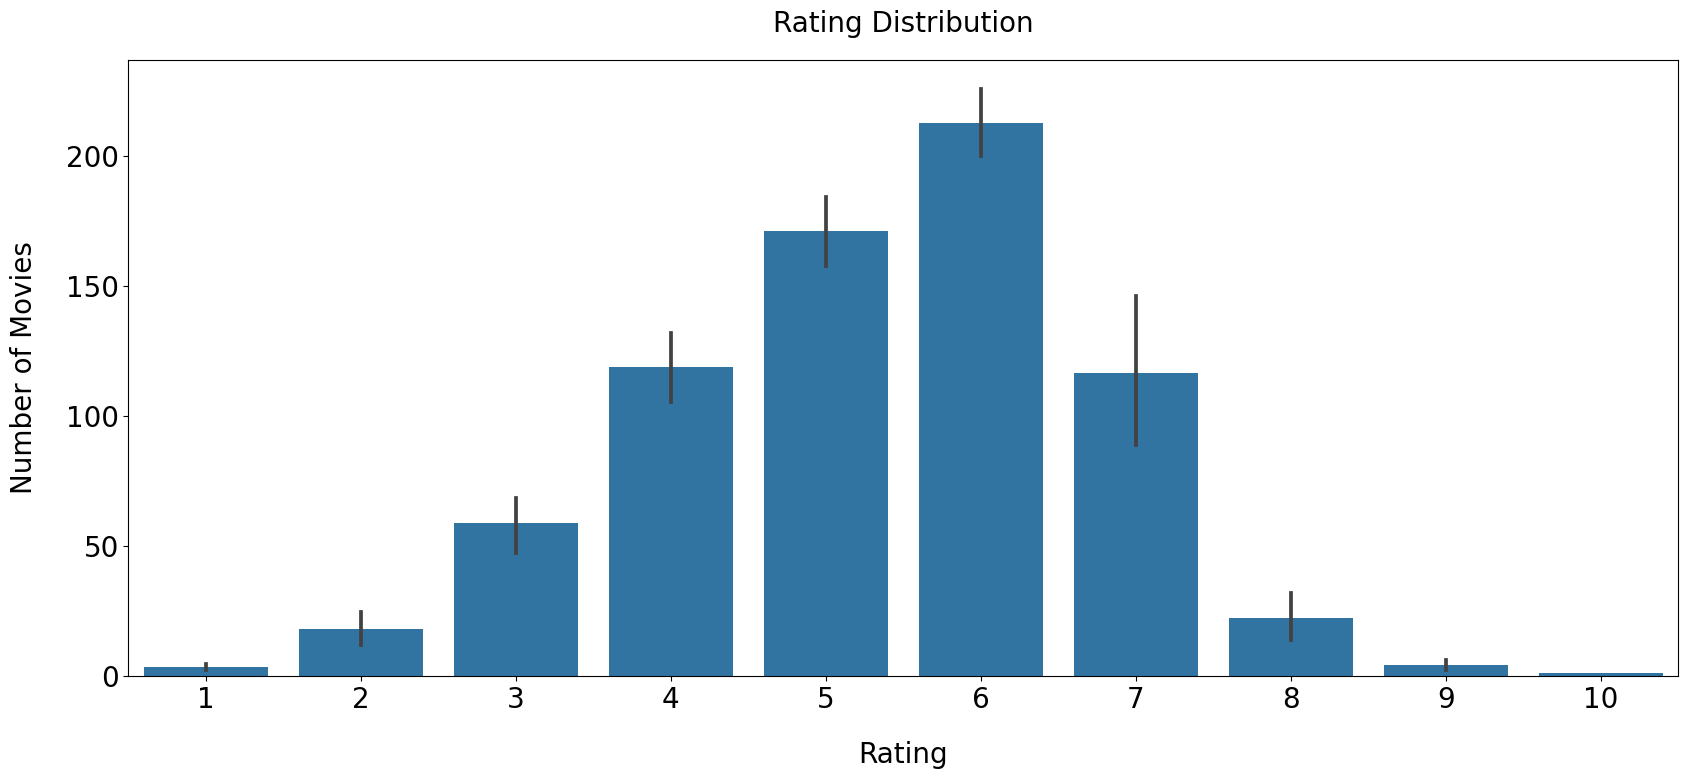

In [37]:
fig, ax = plt.subplots(figsize=(20, 8))

rating_counts = df['Rating'].value_counts().sort_index()

# Convert the x-axis values to integers
x_values = rating_counts.index.astype(int)

sns.barplot(x=x_values,
            y=rating_counts.values,
            color='tab:blue')

plt.title("Rating Distribution", fontsize=20, pad=20)
plt.xlabel("Rating", fontsize=20, labelpad=20)
plt.ylabel("Number of Movies", fontsize=20, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.grid(False)

plt.show()


From the visualization, most movies are rated 5 and 6 , 5 being the highest.

5. Distribution of ratings by genres

In [38]:
# Count of movies per genre
genre_counts = df['Genre'].str.split('|', expand=True).stack().value_counts()
print(genre_counts)

print('+++++++++++++++++++++++++++++++++++++++++++++++++++++')

# Relationship between genres and ratings
genre_ratings = df.groupby('Genre')['Rating'].mean()
genre_ratings = genre_ratings.sort_values(ascending=False)

print(genre_ratings)


Drama                              1080
Action, Crime, Drama                413
Drama, Romance                      410
Action                              391
Drama, Family                       272
                                   ... 
Comedy, Crime, Musical                1
History, Romance                      1
Drama, History, Sport                 1
Biography, Drama, War                 1
Documentary, Biography, Musical       1
Length: 412, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++++++
Genre
History, Romance                9.4
Documentary, Family, History    9.3
Documentary, Music              8.9
Documentary, Thriller           8.7
Documentary, Sport              8.6
                               ... 
Action, Crime, Sci-Fi           2.7
Comedy, Horror, Musical         2.7
Family, Music, Romance          2.6
Biography, Drama, War           2.4
Comedy, Family, Sci-Fi          2.4
Name: Rating, Length: 412, dtype: float64


From the above analysis, genre combinations; Documentary,Music and Documentary,Biography, Musical are highly rated.

6. Which Director directed most movies?

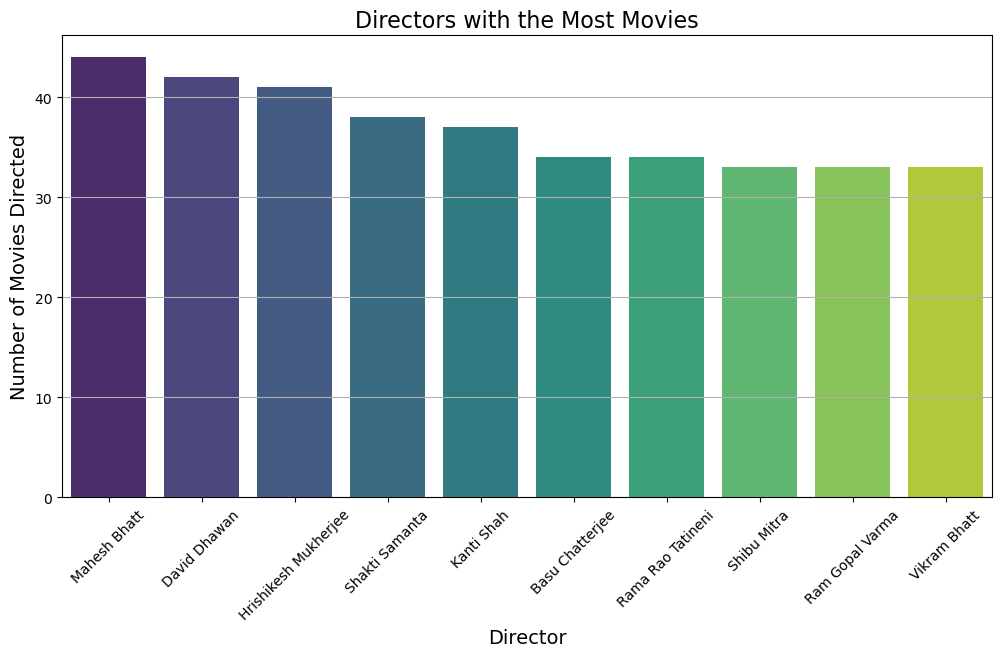

In [39]:
# Count the number of movies directed by each director
director_counts = df['Director'].value_counts()

top_directors = director_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='viridis')
plt.title("Directors with the Most Movies", fontsize=16)
plt.xlabel("Director", fontsize=14)
plt.ylabel("Number of Movies Directed", fontsize=14)
plt.xticks(rotation=45)  # Rotate director names for better visibility
plt.grid(axis='y')
plt.show()

Mahesh Bhatt directed over 40 movies followed by Kanti Shah and David Dhawan with over 35 and 30 repectively.

7. Which actor starred as actor 1 in most movies?

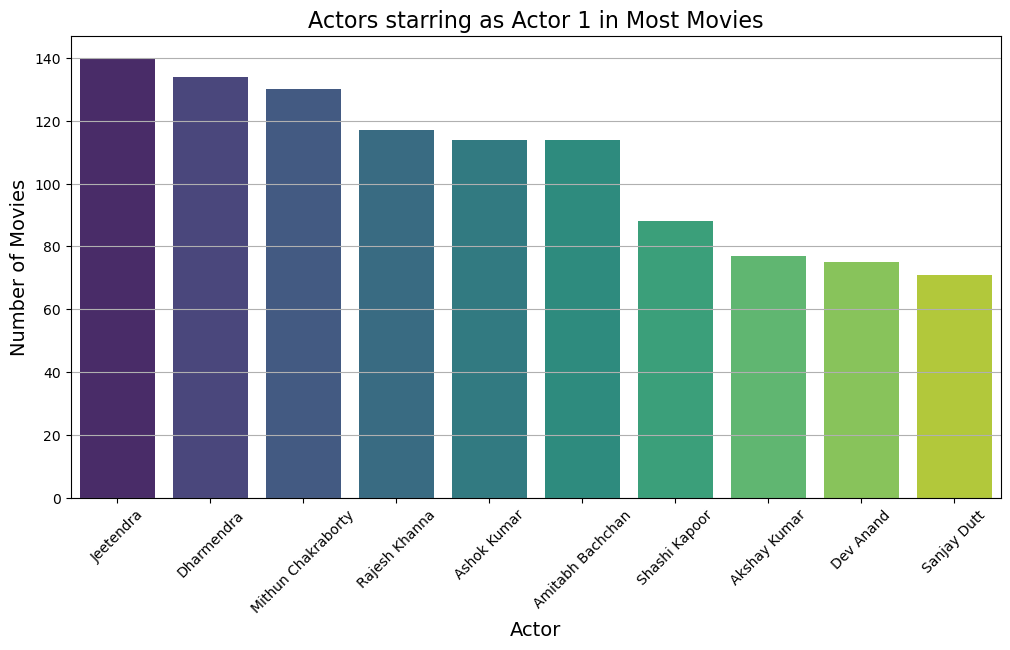

In [40]:
# Count the number of movies directed by each director
Actor1_counts = df['Actor 1'].value_counts()

Actor1_top = Actor1_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=Actor1_top.index, y=Actor1_top.values, palette='viridis')
plt.title("Actors starring as Actor 1 in Most Movies", fontsize=16)
plt.xlabel("Actor", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(rotation=45)  # Rotate director names for better visibility
plt.grid(axis='y')
plt.show()

The top three actors who starred in most movies as actor 1 were Mithun Chakraborty, Jeetendra and Dharmendra respectively.

10. Which actor starred as actor 2 in most movies?

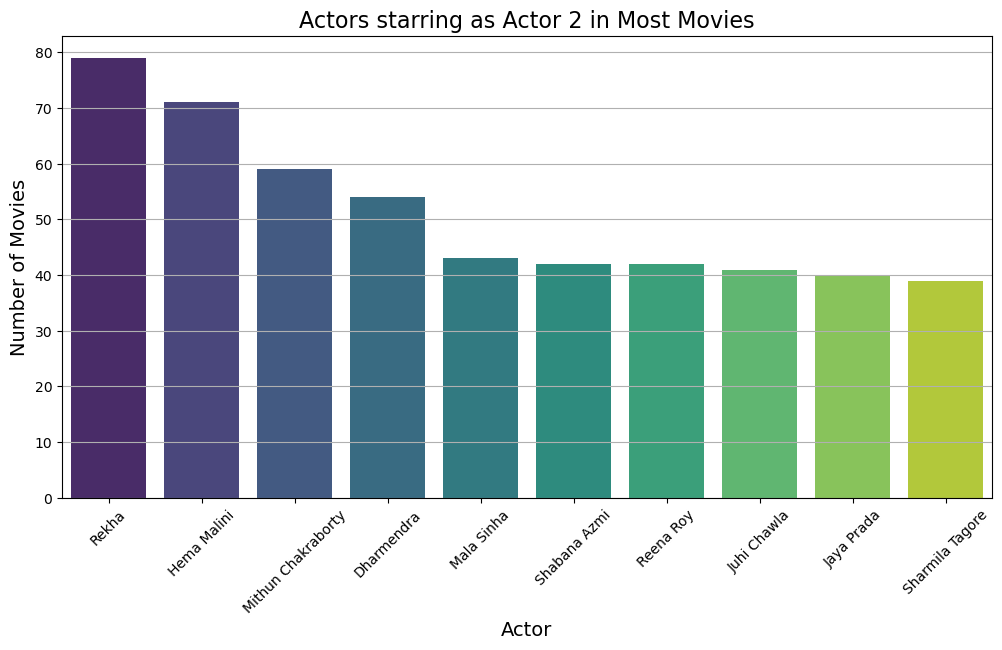

In [41]:
# Count the number of movies directed by each director
Actor1_counts = df['Actor 2'].value_counts()

Actor1_top = Actor1_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=Actor1_top.index, y=Actor1_top.values, palette='viridis')
plt.title("Actors starring as Actor 2 in Most Movies", fontsize=16)
plt.xlabel("Actor", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(rotation=45)  # Rotate director names for better visibility
plt.grid(axis='y')
plt.show()

Actors Rekha, Hema Malini and Mithun Chakraborty starred as Actor 2 in most movies respectively.

9. Which actor starred as actor 3 in most movies?

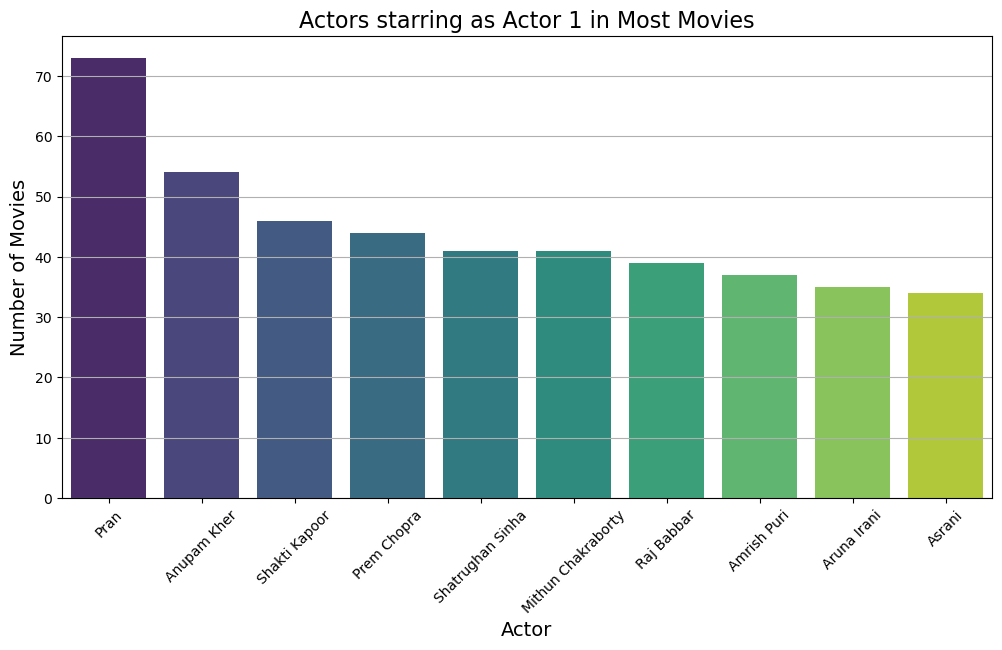

In [42]:
# Count the number of movies directed by each director
Actor1_counts = df['Actor 3'].value_counts()

Actor1_top = Actor1_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=Actor1_top.index, y=Actor1_top.values, palette='viridis')
plt.title("Actors starring as Actor 1 in Most Movies", fontsize=16)
plt.xlabel("Actor", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(rotation=45)  # Rotate director names for better visibility
plt.grid(axis='y')
plt.show()

Shakti Kapoor, Anupam Kher and Raj Babbar are the top three actors who starred in most movies as actor 3

In [43]:
df

,Name,Year,Duration(minutes),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Decade
1,#Gadhvi (He thought he was Gandhi),2019,109.00000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,2010
3,#Yaaram,2019,110.00000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,2010
5,...Aur Pyaar Ho Gaya,1997,147.00000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1990
6,...Yahaan,2005,142.00000,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,2000
8,?: A Question Mark,2012,82.00000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,2010
...,...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,132.29448,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda,1990
15503,Zulm Ki Zanjeer,1989,125.00000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,1980
15504,Zulm Ko Jala Doonga,1988,132.29448,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,1980
15505,Zulmi,1999,129.00000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1990


#### Define predictors and the target variables; X and Y

In [44]:
X = df.drop(['Rating','Decade'],axis=1)
y = df['Rating']

In [45]:
numerics = ['Year','Votes','Duration(minutes)']
from sklearn.preprocessing import MinMaxScaler
#instatiate MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[numerics])
X_scaled_df = pd.DataFrame(X_scaled,columns=numerics)
X_scaled_df


,Year,Votes,Duration(minutes)
0,0.970588,0.000120,0.315412
1,0.970588,0.001197,0.318996
2,0.647059,0.032795,0.451613
3,0.764706,0.043128,0.433692
4,0.867647,0.012807,0.218638
...,...,...,...
7223,0.573529,0.005187,0.398905
7224,0.529412,0.001556,0.372760
7225,0.514706,0.000239,0.398905
7226,0.676471,0.025933,0.387097


In [46]:
numeric = 'Rating'
# Instantiate MinMaxScaler
scaler = MinMaxScaler()
# Reshape 'y' to a 2D array for MinMaxScaler
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))
y = pd.DataFrame(y_scaled, columns=[numeric])



#### One-hot encode the categorical variables

In [47]:
from sklearn.preprocessing import OneHotEncoder
categs = ['Name','Genre','Director','Actor 1','Actor 2','Actor 3']
ohe = OneHotEncoder(sparse=False)
X_cat_encoded = ohe.fit_transform(X[categs])
X_cat_encoded_df = pd.DataFrame(X_cat_encoded,columns=ohe.get_feature_names_out(categs))


In [48]:
X_cat_encoded_df

,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Aur Pyaar Ho Gaya,Name_...Yahaan,Name_100 Days,Name_100% Love,Name_102 Not Out,Name_10ml LOVE,...,Actor 3_Zareen Khan,Actor 3_Zarina Wahab,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Concatenate the numerics and categorical features 

In [49]:
X_encoded_scaled = pd.concat([X_cat_encoded_df, X_scaled_df], axis=1)
X_encoded_scaled

,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Aur Pyaar Ho Gaya,Name_...Yahaan,Name_100 Days,Name_100% Love,Name_102 Not Out,Name_10ml LOVE,...,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed,Year,Votes,Duration(minutes)
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.970588,0.000120,0.315412
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.970588,0.001197,0.318996
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.647059,0.032795,0.451613
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.764706,0.043128,0.433692
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.867647,0.012807,0.218638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.573529,0.005187,0.398905
7224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.529412,0.001556,0.372760
7225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.514706,0.000239,0.398905
7226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.676471,0.025933,0.387097


#### Split the data into training and test splits.

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled,y, test_size=0.3, random_state=44)

## Modeling

Now that our data is clean and fully prepared, it is now ready for modeling. This is a regression problem.

#### Baseline Model; Linear regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#instatiate LinearRegression
lr = LinearRegression()
#fit the model
lr_model = lr.fit(X_train,y_train)
#make prediction on the training and test data
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

#Calculate metrics for regression
mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE train:", mse_train)
mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE test:", mse_test)
r2_train = r2_score(y_train, y_train_pred)
print("R2 train:",r2_train)
r2_test = r2_score(y_test,y_test_pred)
print("R2 test:", r2_test)

MSE train: 1.4417887993714278e-29
MSE test: 0.01969387175884922
R2 train: 1.0
R2 test: 0.21218949225316797


#### Model 2: Decision tree regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
#instatiate the DecisionTreeRegressor
dr = DecisionTreeRegressor(random_state=45)
#fit the model
dr_model = dr.fit(X_train, y_train)
#Make predictions on training and test data
y_train_pred = dr_model.predict(X_train)
y_test_pred = dr_model.predict(X_test)

#calculate metrics of the model
mse_train = mean_squared_error(y_train, y_train_pred)
print('Mse train:',mse_train)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mse test:",mse_test)
r2_train = r2_score(y_train, y_train_pred)
print("R2 train:",r2_train)
r2_test = r2_score(y_test, y_test_pred)
print("R2 test:",r2_test)

Mse train: 5.847456798930212e-35
Mse test: 0.024592686014470583
R2 train: 1.0
R2 test: 0.016223082329515637


### Model 3; Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
# Fit the model on the training data
rf_regressor.fit(X_train, y_train)
# Make predictions on the training and test data
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Calculate regression metrics
mse_train = mean_squared_error(y_train,y_train_pred)
print("Mse train:",mse_train)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mse test:",mse_test)
r2_train = r2_score(y_train, y_train_pred)
print("R2 train:", r2_train)
r2_test = r2_score(y_test, y_test_pred)
print("R2 test:",r2_test)


Mse train: 0.0022600119803196286
Mse test: 0.016117883391044616
R2 train: 0.9086263463864565
R2 test: 0.3552391295328985


Random forest regressor seems to be performing well. We will then tune its hyper parameters to increase its performance.

### Hyperparameter tuning; Random forest Regressor

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_leaf':[2,5,10],
    'min_samples_split':[1,2,4],
    
}
# Instantiate the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)
grid_search.fit(X_train,y_train)
best_rf_regressor = grid_search.best_estimator_


In [55]:
best_rf_regressor

RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=300,
                      random_state=42)

In [56]:
# Make predictions on the training and test data
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# Calculate regression metrics
mse_train = mean_squared_error(y_train,y_train_pred)
print("Mse train:",mse_train)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mse test:",mse_test)
r2_train = r2_score(y_train, y_train_pred)
print("R2 train:", r2_train)
r2_test = r2_score(y_test, y_test_pred)
print("R2 test:",r2_test)

Mse train: 0.007544479385233385
Mse test: 0.0164700781223407
R2 train: 0.6949721275622001
R2 test: 0.3411503452915037


Now that we've improved the performance of our model, we need to store it.

In [65]:
# Get feature importances from the best model
feature_importances = best_rf_regressor.feature_importances_
# Get the names of the features
feature_names = X_train.columns  
# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.head(3)

,Feature,Importance
18023,Votes,0.309963
18022,Year,0.276561
18024,Duration(minutes),0.125413


From the above findings, Votes, Year and Duration are the most important features in our final model.

In [71]:
# Select the top three features 
selected_features = ['Duration(minutes)', 'Year', 'Votes']
# Create a new DataFrame with only the selected features
new_df = df[selected_features]

X = new_df
y = df['Rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest Regressor
rf = RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=300,
                      random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Save the trained model for later use
import pickle
model_filename = 'rf_model.pkl'
with open(model_filename,'wb') as file:
    pickle.dump(rf, file)

print("Model trained and saved.")

Model trained and saved.


Dump the model

### Recommendations

From the insights drawn from the exploratory data analysis that I undertook, I came up with the following recommendations;

1. **Diversify Genres**: Explore movie themes that combine history and romance, documentary and family, and music documentaries, as they have received high ratings.

2. **Engage Thriller Enthusiasts**: Develop engaging thriller documentaries to captivate viewers and enhance movie ratings.

3. **Celebrate Sports Stories**: Create sports documentaries that showcase inspirational sports narratives to appeal to sports enthusiasts.

4. **Explore Drama Varieties**: Diversify drama themes and sub-genres to attract a broader audience and prevent monotony.

5. **Combine Action and Crime**: Craft action-packed crime dramas to enthrall audiences and boost ratings.

6. **Capture Romance and Drama**: Continue producing romantic dramas with compelling storylines for romantic drama enthusiasts.

7. **Optimal Movie Length**: Maintain movie durations within the 120 to 150-minute range to keep viewers engaged and satisfied.

8. **Stay Current**: Stay aligned with audience preferences by continuing to produce movies in line with the 2010s trends.

9. **Collaborate with Seasoned Directors**: Collaborate with experienced directors like Mahesh Bhatt, Kanti Shah, and David Dhawan, known for their successful movies.

10. **Leverage Star Power**: Given the popularity of actors like Mithun Chakraborty, Jeetendra, and Dharmendra, consider collaborating with these experienced and beloved actors in new projects. Their star power can draw audiences and contribute to the success of upcoming movies.

### Conclusion and Next steps

#### Conclusion

In conclusion, the movie rating prediction project has provided valuable insights into the factors that influence movie ratings and has developed a predictive model to estimate movie ratings accurately. This project has the potential to revolutionize decision-making in the film industry by empowering stakeholders to make data-driven choices.

The analysis revealed that movie genres, cast selection, the choice of directors, release timing and duration play pivotal roles in determining movie ratings. Understanding the impact of these factors can help filmmakers, production companies, and streaming platforms make informed choices that improve their chances of success.

Moreover, the project highlights the significance of staying current with audience preferences, diversifying movie genres, and engaging seasoned directors and popular actors to enhance movie ratings.

#### Next Steps

The movie rating prediction project sets the stage for future endeavors in the film industry. Here are the next steps to consider:

1. **Model Refinement**: Continuously refine the rating prediction model with the inclusion of more features and advanced machine learning algorithms to enhance accuracy.

2. **Real-time Data Integration**: Explore the integration of real-time data sources, such as social media sentiment, to adapt to rapidly changing audience preferences.

3. **A/B Testing**: Conduct A/B testing on marketing strategies, casting choices, and movie themes to measure their direct impact on movie ratings.

4. **Collaborations**: Establish partnerships with actors, directors, and studios based on data-driven insights to ensure successful movie projects.

5. **Market Trends Monitoring**: Regularly monitor market trends, customer feedback, and emerging genres to adapt to changing preferences and stay competitive.

6. **Customer Engagement**: Develop innovative audience engagement strategies to build a loyal and engaged viewer base.

7. **Industry Benchmarking**: Continually benchmark against industry peers to measure success and identify areas for improvement.

By embracing these next steps, the film industry can leverage the power of data and insights to navigate the dynamic landscape and secure long-term success in an ever-evolving market.